In [5]:
# Scenario: Healthcare – Predicting Patient Readmission
# A hospital wants to predict whether patients will be readmitted (1) or not (0) based on:
# Length of stay (days)
# Number of lab tests
# Satisfaction score (1–10)
# Just like in your IT company attrition example, a single decision tree might miss subtle patterns. Gradient Boosting builds multiple trees, each correcting the errors of the previous ones, until predictions become strong and reliable.

In [6]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('healthcare_readmission_200.csv')
df.head()

,Length_of_stay,Num_lab_tests,Satisfaction_score,Readmitted
0,7,10,6,0
1,4,32,7,0
2,13,32,10,0
3,11,48,7,1
4,8,48,10,0


In [8]:
X = df[['Length_of_stay', 'Num_lab_tests', 'Satisfaction_score']]
y = df['Readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8


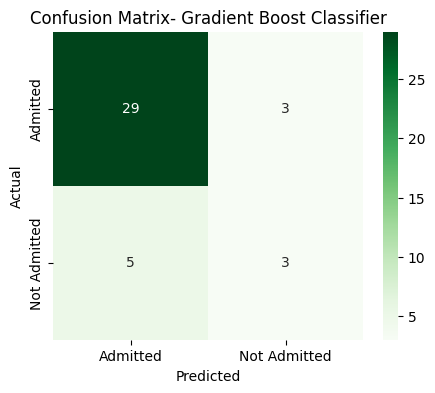

In [10]:
cm = confusion_matrix(y_test, y_pred)
Labels = ['Admitted', 'Not Admitted']
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix- Gradient Boost Classifier')
plt.show()